In [ ]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install -q  qiskit_aer
!pip install -q qiskit_ibm_runtime
# -q stands for "quiet"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

ψ = QuantumRegister(1, 'ψ')
cψ = ClassicalRegister(1, 'cψ')

bell = QuantumRegister(2, 'bell')
c = ClassicalRegister(1, 'c')
cϕ = ClassicalRegister(1, 'cϕ')

qc = QuantumCircuit(ψ, bell, cψ, c, cϕ)
qc.reset(ψ)
qc.reset(bell)


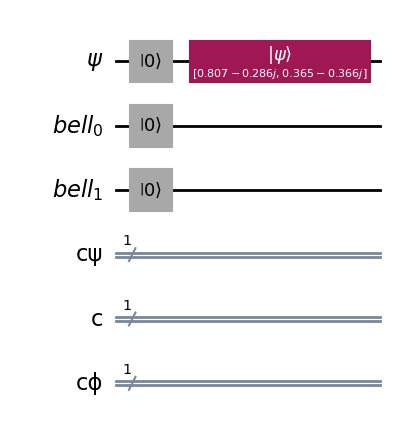

In [ ]:
from qiskit.quantum_info.states.random import random_statevector
from qiskit.circuit.library import Initialize

#Generate two random complex numbers
random_vec = random_statevector(2)

#We will store the squared probabilities for future reference
probs = np.abs(random_vec)**2
probs = {0: probs[0], 1: probs[1]}

state = Initialize(random_vec)
qc.append(state, ψ)

qc.draw(output='mpl')

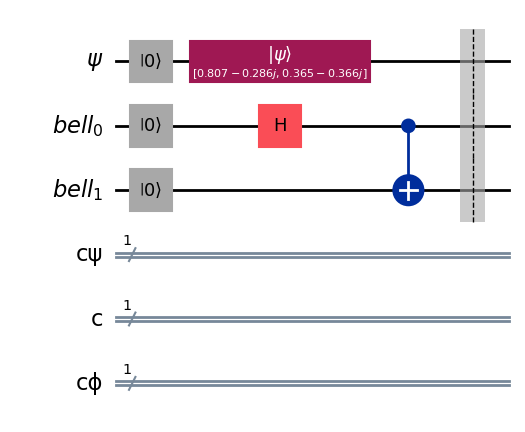

In [ ]:
qc.h(bell[0])
qc.cx(bell[0], bell[1])

qc.barrier() #This is just for visualization purposes

qc.draw(output='mpl')

In [ ]:
qc.cx(ψ, bell[0])
qc.h(ψ)

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "ψ"), index=0>, <Qubit register=(2, "bell"), index=0>, <Qubit register=(2, "bell"), index=1>), clbits=())

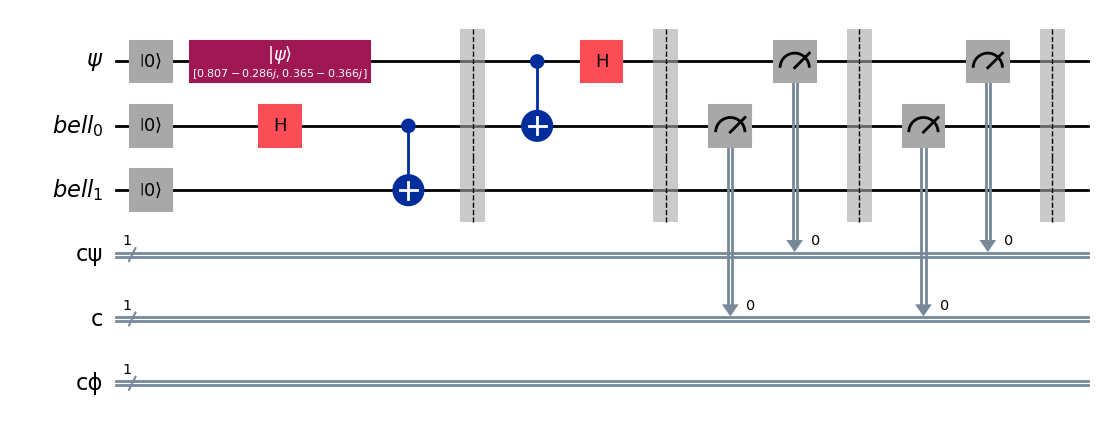

In [ ]:
qc.measure(bell[0], c)
qc.measure(ψ, cψ)
qc.barrier()
qc.draw(output='mpl')